# CARGA DE DATOS

__TODO__

In [1]:
from Utils import DatasetProcess, reconstruction_plot
from ConvModel import ConvModel
from AutoEncoder import TwoStepAutoEncoder, TwoStepClassifier, TwoStepTraining, OneStepAutoencoder, OneStepTraining
from OneClass import AnomalyDetector
from Contrastive import ContrastiveModel

2025-04-03 20:31:24.009941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743705084.020888  267848 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743705084.024447  267848 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743705084.033711  267848 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743705084.033720  267848 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743705084.033722  267848 computation_placer.cc:177] computation placer alr

In [2]:
(x_train, y_train), (x_test, y_test) = DatasetProcess.load()


# Aplicar la función hold_out
(x_train_no_labeled, x_train_labeled, y_train_labeled), (x_val, y_val), (x_test, y_test) = DatasetProcess.hold_out(
    (x_train, y_train), (x_test, y_test), validation_size=1000
)

x_train_labeled = x_train_labeled.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verificar las dimensiones
print(f"Datos no etiquetados: {x_train_no_labeled.shape}")
print(f"Datos etiquetados entrenamiento: {x_train_labeled.shape}")
print(f"Etiquetas entrenamiento: {y_train_labeled.shape}")
print(f"Datos validación: {x_val.shape}")
print(f"Etiquetas validación: {y_val.shape}")
print(f"Datos prueba: {x_test.shape}")
print(f"Etiquetas prueba: {y_test.shape}")

Datos no etiquetados: (40000, 32, 32, 3)
Datos etiquetados entrenamiento: (9000, 32, 32, 3)
Etiquetas entrenamiento: (9000, 1)
Datos validación: (1000, 32, 32, 3)
Etiquetas validación: (1000, 1)
Datos prueba: (10000, 32, 32, 3)
Etiquetas prueba: (10000, 1)


# EJERCICIO 1

Entrena un modelo, creado sobre TensorFlow, haciendo uso únicamente de las instancias etiquetadas de entrenamiento. Dicho modelo debe de tener al menos cuatro capas densas y/o convolucionales.

Responde a las siguientes preguntas:

1. ¿Qué red has escogido? ¿Por qué? ¿Cómo la has entrenado?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Qué conclusiones sacas de los resultados detallados en el punto anterior?

In [3]:
model_base = ConvModel()
history_base = model_base.fit(
    x_train_labeled, 
    y_train_labeled,
    validation_data=(x_val, y_val),
    batch_size=128,
    epochs=100
)

/home/clown/2-semester/3year2sem/maai/maai_env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1743705088.720707  267848 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9484 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:06:00.0, compute capability: 8.6
/home/clown/2-semester/3year2sem/maai/maai_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


E0000 00:00:1743705093.660447  267848 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1743705095.059550  267968 cuda_dnn.cc:529] Loaded cuDNN version 90501


71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.0310 - loss: 9.5357 - val_accuracy: 0.0060 - val_loss: 9.1749
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.0650 - loss: 8.3670 - val_accuracy: 0.0180 - val_loss: 8.6135
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.0818 - loss: 7.4042 - val_accuracy: 0.0100 - val_loss: 8.6545
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.0880 - loss: 6.6957 - val_accuracy: 0.0110 - val_loss: 7.8335
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.1019 - loss: 6.1529 - val_accuracy: 0.0180 - val_loss: 7.1302
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.1211 - loss: 5.6850 - val_accuracy: 0.0200 - val_loss: 6.6079
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.1292 - loss: 5.3663 - val_accuracy: 0.0300 - val_loss: 6.0843
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.1505 - loss: 5.0577 - val_accuracy: 0.0800 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2892 - loss: 3.5578
Accuracy en conjunto de prueba: 0.295199990272522


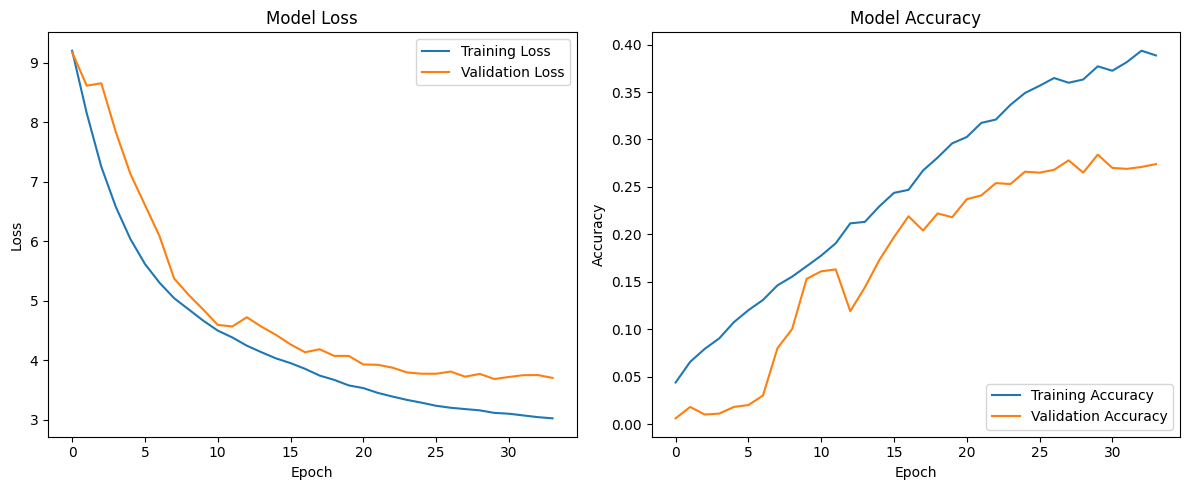

In [4]:
# Evalúa con el conjunto de prueba
test_accuracy = model_base.score(x_test, y_test)
print(f"Accuracy en conjunto de prueba: {test_accuracy}")

model_base.plot(history_base)

# EJERCICIO 2

Entrena el mismo modelo, incorporando las instancias no etiquetadas de entrenamiento mediante la técnica de auto-aprendizaje. Opcionalmente, se ponderará cada instancia de entrada en función de su calidad (o certeza).

Responde a las siguientes preguntas:
1. ¿Qué parámetros has definido para el entrenamiento?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en el Ejercicio 1?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

Epoch 1/100


E0000 00:00:1743705253.496206  267848 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1_1/dropout_5_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.0293 - loss: 17.3098 - val_accuracy: 0.0140 - val_loss: 11.6209
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.0612 - loss: 14.3780 - val_accuracy: 0.0120 - val_loss: 9.8001
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.0822 - loss: 12.3538 - val_accuracy: 0.0260 - val_loss: 8.1907
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.0868 - loss: 11.2078 - val_accuracy: 0.0480 - val_loss: 7.2055
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.1007 - loss: 10.4423 - val_accuracy: 0.0690 - val_loss: 6.5754
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.1172 - loss: 9.8486 - val_accuracy: 0.0980 - val_loss: 6.0789
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.1396 - loss: 9.4062 - val_accuracy: 0.1350 - val_loss: 5.7454
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.1502 - loss: 9.0201 - val_a

E0000 00:00:1743705489.575675  267848 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_10_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


227/227 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.0858 - loss: 14.3482 - val_accuracy: 0.0120 - val_loss: 11.4290
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.1832 - loss: 10.1617 - val_accuracy: 0.0290 - val_loss: 7.6829
Epoch 3/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.2416 - loss: 8.3008 - val_accuracy: 0.0780 - val_loss: 6.3296
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.2852 - loss: 7.3304 - val_accuracy: 0.1320 - val_loss: 5.6281
Epoch 5/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3239 - loss: 6.7466 - val_accuracy: 0.1260 - val_loss: 5.4690
Epoch 6/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3516 - loss: 6.4034 - val_accuracy: 0.1730 - val_loss: 5.0740
Epoch 7/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.3959 - loss: 5.9305 - val_accuracy: 0.1890 - val_loss: 4.8926
Epoch 8/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.4183 - loss: 5.7016 - val_accu

E0000 00:00:1743705719.973890  267848 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


282/282 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.1220 - loss: 13.1508 - val_accuracy: 0.0140 - val_loss: 9.5750
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.2252 - loss: 8.7326 - val_accuracy: 0.0430 - val_loss: 6.8930
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.2966 - loss: 6.9361 - val_accuracy: 0.1170 - val_loss: 5.6894
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.3471 - loss: 6.1132 - val_accuracy: 0.1590 - val_loss: 5.2042
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.4032 - loss: 5.5305 - val_accuracy: 0.1620 - val_loss: 4.9773
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.4478 - loss: 5.1411 - val_accuracy: 0.1870 - val_loss: 4.8234
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.4872 - loss: 4.8744 - val_accuracy: 0.2110 - val_loss: 4.6669
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.5060 - loss: 4.7430 - val

E0000 00:00:1743705910.941822  267848 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


309/309 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.1193 - loss: 12.7320 - val_accuracy: 0.0180 - val_loss: 9.3432
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.2611 - loss: 8.1262 - val_accuracy: 0.0690 - val_loss: 6.6370
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3247 - loss: 6.4887 - val_accuracy: 0.1240 - val_loss: 5.5436
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.3887 - loss: 5.6405 - val_accuracy: 0.1530 - val_loss: 5.1311
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.4361 - loss: 5.1780 - val_accuracy: 0.1780 - val_loss: 5.0477
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.4866 - loss: 4.7697 - val_accuracy: 0.1860 - val_loss: 4.8266
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5029 - loss: 4.6058 - val_accuracy: 0.2000 - val_loss: 4.6893
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5107 - loss: 4.5390 - val

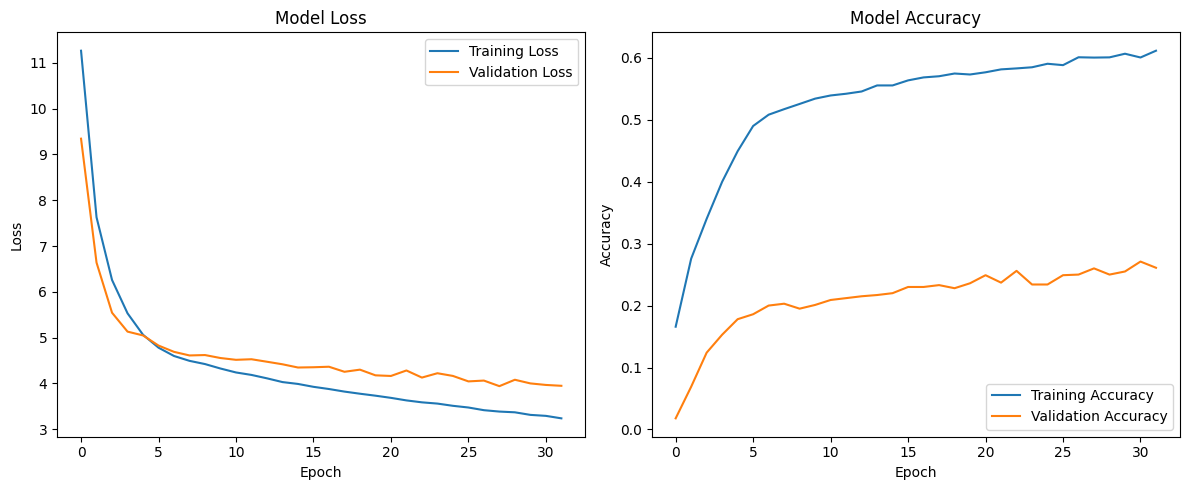

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2912 - loss: 3.7650
Accuracy del modelo final con self-training: 0.2930999994277954
Mejora respecto al modelo base: -0.0021


In [5]:
# Función para crear modelos consistentes durante self-training
def create_model():
    return ConvModel(
        learning_rate=0.0005,  # Learning rate reducido para fine-tuning
        dropout_prob=0.25,     
        l2_lambda=0.005        
    )

# Normalizar datos no etiquetados
x_train_no_labeled = x_train_no_labeled.astype('float32') / 255.0

# Aplica self-training con datos no etiquetados
final_model = ConvModel.self_training_v2(
    model_func=create_model,
    x_train=x_train_labeled,
    y_train=y_train_labeled,  
    unlabeled_data=x_train_no_labeled,
    validation_data=(x_val, y_val),
    thresh=0.6,             
    train_epochs=4,
    verbose=1
)

# Evalúa el modelo final
final_accuracy = final_model.score(x_test, y_test)
print(f"Accuracy del modelo final con self-training: {final_accuracy}")
print(f"Mejora respecto al modelo base: {final_accuracy - test_accuracy:.4f}")